# Twitter Sentiment Analysis #metaverse

In [1]:
author: "Antoneey Calizaya"

### Executive Summary
This report involves an analysis of tweets containing the hashtag `#metaverse`. The goal was to find out what user were saying and how they felt about it. And how these insights may be useful from a business standpoint. 

Data for this report was sourced directly from `Twitter` using the `Rtweet package` in R, based on the keyword `#metaverse`. A total of just under 17000 tweets were collected during the sampling period. In total 43 different variables are covered, most of which will not be used in the analysis.

The results of thi anlysis shows that using sentimental analysis prompts to effective engagement with the metaverse community.

### Introduction
Metaverses are graphical applications that allow users to play games, meet, work, shop, etc. Furthermore, it allows people to enjoy 3D spaces. It is a combination of virtual reality, augmented reality, and blockchain technology. Companies that have jumped on board the metaverse train also envision a new digital economy where goods can be created, bought, and sold. 

Many companies are developing technology for interacting with virtual worlds, including Microsoft and Meta. The infrastructure for creating virtual worlds that more closely resemble our physical lives is being built by a number of large companies, including many smaller firms and startups.  All of this sounds great and amazing, but how well will these companies communicate about the global metaverse innovation to their communities?

By examining Twitter data, companies will be able to capture what people are saying about metaverse right now and how they feel about it. It also allows them to develop a messaging strategy about this metaverse trend that can be shared around the community.

#### Import libraries and twitter dataset
To analise the data involved in this report, it woul be use the `Pandas Library`. One of the most flexible open souce for data manipulation.

For classify the and performance the sentiment analysis it would be use the `NLTK library`. It's one of the most advanced feaures for text classifiers, that will allows obtains insights from the tweets and classify them into overall positive, negatibr or neutral tweets.

To plot graphs and visualise the data it would be use the `Seaborn library`. 

In [23]:
#installing and importing libraries
!pip install pandas
!pip install nltk
!pip install SentimentIntensityAnalyzer
!pip install seaborn
!pip install numpy



import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
nltk.downloader.download('vader_lexicon')

import matplotlib.pyplot as plt
#import scipy as sp

ERROR: Could not find a version that satisfies the requirement SentimentIntensityAnalyzer (from versions: none)
ERROR: No matching distribution found for SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AntoneelyCalizaya\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#!pip install jupyterthemes
#rom jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

#### About the data
A total of just under 17000 tweets were collected during the sampling period. In total 42 different variables are covered, most of which will not be used in the analysis. 
By running the data through the info function it can be seen that many variables contain alot of NA values.

In [4]:
#read csv file that contains tweets
metaverse = pd.read_csv('metaverse_final_dataset1.csv')

In [5]:
#summary of dataset
metaverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     16782 non-null  object 
 1   id                             16782 non-null  float64
 2   id_str                         16782 non-null  float64
 3   full_text                      16782 non-null  object 
 4   truncated                      16782 non-null  bool   
 5   display_text_range             16782 non-null  int64  
 6   entities                       0 non-null      float64
 7   metadata                       0 non-null      float64
 8   source                         16782 non-null  object 
 9   in_reply_to_status_id          7181 non-null   float64
 10  in_reply_to_status_id_str      7181 non-null   float64
 11  in_reply_to_user_id            7560 non-null   float64
 12  in_reply_to_user_id_str        7560 non-null  

#### Labeing and categorising each tweet
To label and categorise each tweet it would be used the `SentimentIntensityAnalyser()` function from the `nltk` library. It is a procedure that assigns a score from -1 to 1 for a piece of text with <-0.2 being negative and >0.2 being positive, in this case.

In [6]:
#import SentimentIntensityAnalyzer class
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

#create a SentimentIntensityAnalyzer object,it gives a sentiment dictionary
sia = SentimentIntensityAnalyzer() 
results=[]

for item in metaverse['text']:
    pol_score = sia.polarity_scores(item)
    pol_score['Headline'] = item
    results.append(pol_score)
    
metaverse = pd.DataFrame.from_records(results)

#decide sentiment as positive, negative and neutral
metaverse['label'] = "Neutral" 
metaverse.loc[metaverse['compound'] > 0.2, 'label'] = "Positive" 
metaverse.loc[metaverse['compound'] < -0.2, 'label'] = "Negative"

#create new dataframe with the tweet and sentiment label
metaverse1 = metaverse[['Headline', 'label']] 

In [7]:
metaverse1

Headline     label
0      At $POODL we never sleep What are we working o...  Positive
1       is joining hands with Acenttech to give away ...  Positive
2                       Our version of binance in          Neutral
3      AazadAl AtheniaLuv ardavan BaluniShrishti GESC...   Neutral
4      Its happening Catch us on MetaIslandggs discor...  Negative
...                                                  ...       ...
16777  pinkmollly Fact\nTop Gainers in  Ecosystem\n $...  Positive
16778  Crypto Sentiment of Today\nStatus Extreme Fear...  Negative
16779  wehaterambo Fact\nTop Gainers in  Ecosystem\n ...  Positive
16780  Beauty will save the world  Cat dog whale all ...  Positive
16781  Let  guide you in your journey in    \n\nDid y...   Neutral

[16782 rows x 2 columns]

#### Exploring the tweets with labels
In the timeframe covered by this Project, tweets mostly contained positive and neutral words. Metaverse tend to draw a positive and cheerful comunity, which tends to avoid negative words.

C:\Users\AntoneelyCalizaya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


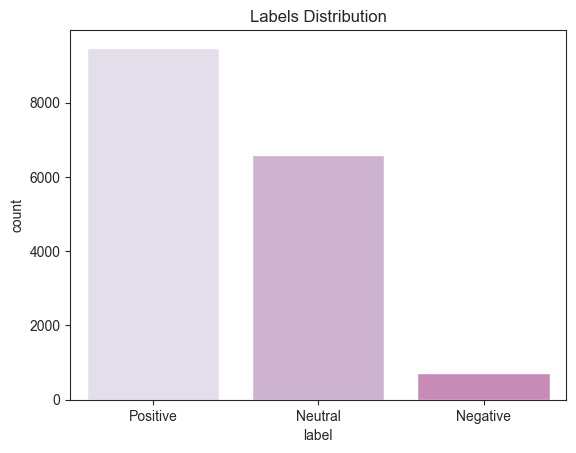

In [34]:
#plot distribution of tweets labeled

#plot style
sns.set_style("ticks")
#plot palette
sns.set_palette("PuRd")

#count labels and plot a bar chart
sns.countplot(metaverse1['label'],label = 'Number of Tweets').set(title='Labels Distribution')
plt.show()


In [9]:
metaverse1.label.value_counts(normalize = True)

Positive    0.564772
Neutral     0.392861
Negative    0.042367
Name: label, dtype: float64

#### Tweet preprocessing: Cleaning the tweets, stop words and tokenise
As tweets are quite messy with special characters, urls and emojis, the below code will clean up the tweets, tokenise the tweets and omit stop words. 

In [10]:
#import re module, for regular expression support, it will allow to search for a pattern within the tweet
import re 

In [11]:
#create new dataframe with the tweets
tidy_tweets = metaverse1['Headline']
#join the characters again to form the string
tidy_tweets_ = ''.join(tidy_tweets )

tidy_tweets_

'At $POODL we never sleep What are we working on\n\n \n  \n \n \n New  for multiple platforms \n \n In platform  in the  \n  partnerships\n\nSafe Secure Trusted\n\n is joining hands with Acenttech to give away  Lands in   \n\nComplete the  tasks and we will select  winners to receive the  Lands\n\n ACENT Land worth  $ETH  winner \n ACENT Land worth  $ETH  winnersOur version of binance in       AazadAl AtheniaLuv ardavan BaluniShrishti GESChampionship ArchieNeko Ashipaper Jes MohitRaich Pokesecr Davcs kokid ArchieNeko all the way You dont want to miss this guys $Archie  ArchieNeko     Its happening Catch us on MetaIslandggs discord channel  what are you waiting for APompliano \n\n    CryptoMOLAh Destined for billions         smeta \n     \nThe project has good development and longterm opportunities The project is developing rapidly Success in the future project is guaranteeda decentralized and secure green Token built for the future of our planet\n\n                      belufrancese Pl

In [12]:
#removing hashtags and mentions to get the clean content of a tweet without all that elements with regex.
tidy_tweets_ = re.sub("@[A-Za-z0-9_]+","", tidy_tweets_)
tidy_tweets_ = re.sub("#[A-Za-z0-9_]+","", tidy_tweets_)

#removing links, not necessary for text processing
tidy_tweets_ = re.sub(r"http\S+", "", tidy_tweets_)
tidy_tweets_ = re.sub(r"www.\S+", "", tidy_tweets_)

#removing punctuactions such as period, comma, exclamation mark, question mark, etc. 
tidy_tweets_  = re.sub('[()!?]', ' ', tidy_tweets_)
tidy_tweets_  = re.sub('\[.*?\]',' ', tidy_tweets_)

#filtering non-alphanumeric characters
tidy_tweets_ = re.sub("[^a-z0-9]"," ", tidy_tweets_)
tidy_tweets_


' t        we never sleep  hat are we working on             ew  for multiple platforms      n platform  in the     partnerships   afe  ecure  rusted   is joining hands with  centtech to give away   ands in      omplete the  tasks and we will select  winners to receive the   ands          and worth        winner          and worth        winners ur version of binance in        azad l  thenia uv ardavan  aluni hrishti     hampionship  rchie eko  shipaper  es  ohit aich  okesecr  avcs kokid  rchie eko all the way  ou dont want to miss this guys   rchie   rchie eko      ts happening  atch us on  eta slandggs discord channel  what are you waiting for   ompliano        rypto    h  estined for billions         smeta         he project has good development and longterm opportunities  he project is developing rapidly  uccess in the future project is guaranteeda decentralized and secure green  oken built for the future of our planet                        belufrancese  lease focus on        ith

In [13]:
#stop words removal, words that are considered unimportant to the meaning of the tweet

#dowload and import stopwprds modelue
nltk.download('stopwords')
from nltk.corpus import stopwords

#define the list of stop words in English
stopwords = stopwords.words("english")

words = []
for e in tidy_tweets_.split():
    if e.lower() not in stopwords:
        words.append(e.lower())
        
tidy_tweets_stop = " ".join(words)
print(tidy_tweets_stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AntoneelyCalizaya\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


never sleep hat working ew multiple platforms n platform partnerships afe ecure rusted joining hands centtech give away ands omplete tasks select winners receive ands worth winner worth winners ur version binance azad l thenia uv ardavan aluni hrishti hampionship rchie eko shipaper es ohit aich okesecr avcs kokid rchie eko way ou dont want miss guys rchie rchie eko ts happening atch us eta slandggs discord channel waiting ompliano rypto h estined billions smeta project good development longterm opportunities project developing rapidly uccess future project guaranteeda decentralized secure green oken built future planet belufrancese lease focus ithout influencers marketing agencies relies strength community stay strong creating multiplanetary world belonging attributes wonder still going finish line andbox ame glitch works please fix want leaderboard season fair also note hacking bug testing ig ao listening ay e n rypto ick attle usi ndrometans e busy work together morning finalizing do

In [14]:
new_stopwords=["abbit","ab","ack"]
words = []
for e in tidy_tweets_stop.split():
    if e.lower() not in new_stopwords:
        words.append(e.lower())
        
tidy_tweets_stop2 = " ".join(words)
print(tidy_tweets_stop2)

never sleep hat working ew multiple platforms n platform partnerships afe ecure rusted joining hands centtech give away ands omplete tasks select winners receive ands worth winner worth winners ur version binance azad l thenia uv ardavan aluni hrishti hampionship rchie eko shipaper es ohit aich okesecr avcs kokid rchie eko way ou dont want miss guys rchie rchie eko ts happening atch us eta slandggs discord channel waiting ompliano rypto h estined billions smeta project good development longterm opportunities project developing rapidly uccess future project guaranteeda decentralized secure green oken built future planet belufrancese lease focus ithout influencers marketing agencies relies strength community stay strong creating multiplanetary world belonging attributes wonder still going finish line andbox ame glitch works please fix want leaderboard season fair also note hacking bug testing ig ao listening ay e n rypto ick attle usi ndrometans e busy work together morning finalizing do

In [15]:
#tokenisation the tweets

#install sklearn module
!pip install sklearn
#to use the sklearn.feature_extraction.text.CountVectorizer to split the tweet into words into a list.
from sklearn.feature_extraction.text import CountVectorizer

tidy_tweets_stop2 = [tidy_tweets_stop2]
vectorizer = CountVectorizer()
tidy_tweets_tokenise= vectorizer.fit_transform(tidy_tweets_stop2)
print(vectorizer.get_feature_names())



['aaaawesome', 'aaaguu', 'aagventures', 'aalhajri', 'aan', 'aana', 'aave', 'aavegotchi', 'aax', 'aay', 'abafemi', 'abah', 'abai', 'abal', 'abaniasif', 'abaraz', 'abatin', 'abayan', 'abbana', 'abbe', 'abbir', 'abbits', 'abbo', 'abdash', 'abdiibrahimilac', 'abed', 'abedelvetah', 'abeink', 'aber', 'abercom', 'abes', 'abib', 'abies', 'abil', 'abila', 'abilities', 'ability', 'abine', 'abinjr', 'abir', 'able', 'ablo', 'ablocro', 'abnormal', 'aboard', 'aboni', 'abor', 'aborious', 'abosh', 'abotage', 'abour', 'abrahymkhany', 'abre', 'abrfps', 'abriele', 'abrishers', 'abriziobustama', 'abros', 'abs', 'absolute', 'absolutely', 'absolutley', 'abstract', 'abu', 'abunia', 'aburayhan', 'abusalam', 'abusayed', 'abvn', 'abwelt', 'aby', 'abydoge', 'abyhaha', 'abylon', 'ac', 'aca', 'acadam', 'academic', 'academician', 'academy', 'acante', 'acc', 'accelerate', 'accelerates', 'accelerating', 'accelerator', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessibility', '

C:\Users\AntoneelyCalizaya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
tidy_tweets_tokenise_=vectorizer.get_feature_names()
print(tidy_tweets_tokenise_)


['aaaawesome', 'aaaguu', 'aagventures', 'aalhajri', 'aan', 'aana', 'aave', 'aavegotchi', 'aax', 'aay', 'abafemi', 'abah', 'abai', 'abal', 'abaniasif', 'abaraz', 'abatin', 'abayan', 'abbana', 'abbe', 'abbir', 'abbits', 'abbo', 'abdash', 'abdiibrahimilac', 'abed', 'abedelvetah', 'abeink', 'aber', 'abercom', 'abes', 'abib', 'abies', 'abil', 'abila', 'abilities', 'ability', 'abine', 'abinjr', 'abir', 'able', 'ablo', 'ablocro', 'abnormal', 'aboard', 'aboni', 'abor', 'aborious', 'abosh', 'abotage', 'abour', 'abrahymkhany', 'abre', 'abrfps', 'abriele', 'abrishers', 'abriziobustama', 'abros', 'abs', 'absolute', 'absolutely', 'absolutley', 'abstract', 'abu', 'abunia', 'aburayhan', 'abusalam', 'abusayed', 'abvn', 'abwelt', 'aby', 'abydoge', 'abyhaha', 'abylon', 'ac', 'aca', 'acadam', 'academic', 'academician', 'academy', 'acante', 'acc', 'accelerate', 'accelerates', 'accelerating', 'accelerator', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessed', 'accessibility', '

#### Create a pipeline to remove punctuation, remove stopwords and tokenization
The step explained in the Tweet preprocessing can be combine into one function. Then the function can be applied to the set of tweets. 

In [21]:
#define a pipeline to clean up all the messages 
#pipeline performs the following: (1) remove punctuation, (2) remove stopwords and (3)tokenization
def clean_tweet(tidy_tweets):
    if type(tidy_tweets) == np.float:
        return ""
    tidy_tweets_ = ''.join(tidy_tweets )
    tidy_tweets_ = re.sub("@[A-Za-z0-9_]+","", tidy_tweets_)
    tidy_tweets_ = re.sub("#[A-Za-z0-9_]+","", tidy_tweets_)
    tidy_tweets_ = re.sub(r'http\S+', '', tidy_tweets_)
    tidy_tweets_ = re.sub('[()!?]', ' ', tidy_tweets_)
    tidy_tweets_ = re.sub('\[.*?\]',' ', tidy_tweets_)
    tidy_tweets_ = re.sub("[^a-z0-9]"," ", tidy_tweets_)
    tidy_tweets_ = tidy_tweets_.split()
    tidy_tweets_ = [w for w in tidy_tweets_ if not w in stopwords]    
    return tidy_tweets_

tweets=metaverse1['Headline']

#test the newly added function
results = [clean_tweet(tw) for tw in tweets]
results


C:\Users\AntoneelyCalizaya\AppData\Local\Temp\ipykernel_36452\1788961972.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tidy_tweets) == np.float:


[['never',
  'sleep',
  'hat',
  'working',
  'ew',
  'multiple',
  'platforms',
  'n',
  'platform',
  'partnerships',
  'afe',
  'ecure',
  'rusted'],
 ['joining',
  'hands',
  'centtech',
  'give',
  'away',
  'ands',
  'omplete',
  'tasks',
  'select',
  'winners',
  'receive',
  'ands',
  'worth',
  'winner',
  'worth',
  'winners'],
 ['ur', 'version', 'binance'],
 ['azad',
  'l',
  'thenia',
  'uv',
  'ardavan',
  'aluni',
  'hrishti',
  'hampionship',
  'rchie',
  'eko',
  'shipaper',
  'es',
  'ohit',
  'aich',
  'okesecr',
  'avcs',
  'kokid',
  'rchie',
  'eko',
  'way',
  'ou',
  'dont',
  'want',
  'miss',
  'guys',
  'rchie',
  'rchie',
  'eko'],
 ['ts',
  'happening',
  'atch',
  'us',
  'eta',
  'slandggs',
  'discord',
  'channel',
  'waiting',
  'ompliano'],
 ['rypto', 'h', 'estined', 'billions'],
 ['smeta',
  'project',
  'good',
  'development',
  'longterm',
  'opportunities',
  'project',
  'developing',
  'rapidly',
  'uccess',
  'future',
  'project',
  'guarante

#### WordCloud of Tweets
Beides the word metaverse, the word accelerate, accept and account were the most common words in tweets containing #metaverse. Next in popularity are achievement, activation, action, digital,advancement. This would indicate that companies and users are talking about incoming metaverse projects and they feel exciting about it.

In [18]:
#install WordCloud library
!pip install WordCloud
from wordcloud import WordCloud



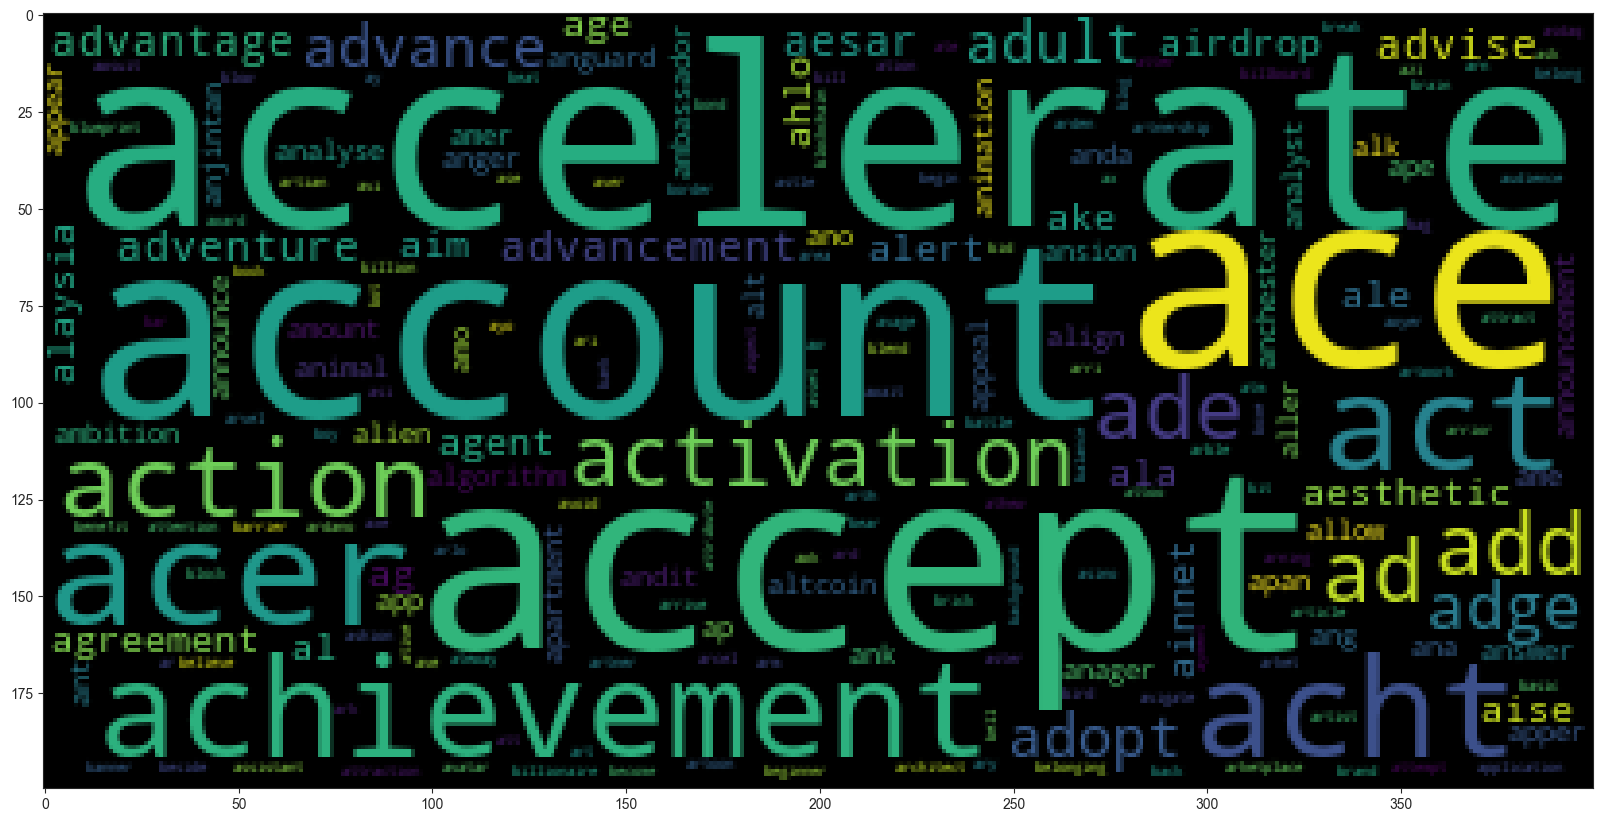

In [24]:
words= ','.join([str(i) for i in tidy_tweets_tokenise_])

#generating thw wordcloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(words))

#### Train a Naive Bayes Classifier Model

Naive Bayes Classifier Model will allow to understand the likewood of a tweet been positive or negative if a tweet contains a certein word.

In [25]:
#apply count vector and apply Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
#Using the function we created before
vectorizer = CountVectorizer(analyzer = clean_tweet)
tweets_countvectorizer = CountVectorizer (analyzer = clean_tweet,dtype= np.dtype(np.int32)).fit_transform(metaverse1['Headline']).toarray()

C:\Users\AntoneelyCalizaya\AppData\Local\Temp\ipykernel_36452\1788961972.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tidy_tweets) == np.float:


In [26]:
tweets_countvectorizer.shape

(16782, 18047)

In [27]:
X = tweets_countvectorizer
y = metaverse1['label']

In [28]:
X.shape

(16782, 18047)

In [29]:
y.shape

(16782,)

In [30]:
#divide the data into training and testing before training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
#training the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_test, y_test)

MultinomialNB()

<AxesSubplot:>

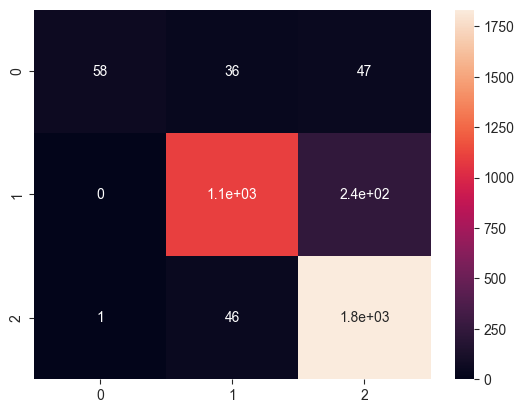

In [32]:
#predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [33]:
#Evaluating Model
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

    Negative       0.98      0.41      0.58       141
     Neutral       0.93      0.82      0.87      1336
    Positive       0.87      0.97      0.92      1880

    accuracy                           0.89      3357
   macro avg       0.93      0.74      0.79      3357
weighted avg       0.90      0.89      0.88      3357



The classifier was able to achieve an accuracy of 90%. More analysis is required to be able to understand the likewood of a tweet been positive or negative if a tweet contains a certein word with Naive Bayes model. 